In [199]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [200]:
import sys
sys.path.append("../core/simulations")
import simulations
import numpy as np
import matplotlib.pyplot as plt
import visuals

plt.style.use("ggplot")

# Muller-Brown Potential

In [165]:
mw_sim_1 = simulations.SimulationData("configs/muller_well_config_1.yml")
mw_sim_1.runSimulation()
mw_sim_2 = simulations.SimulationData("configs/muller_well_config_2.yml")
mw_sim_2.runSimulation()

In [166]:
a = mw_sim_1.getData()
b = mw_sim_2.getData()

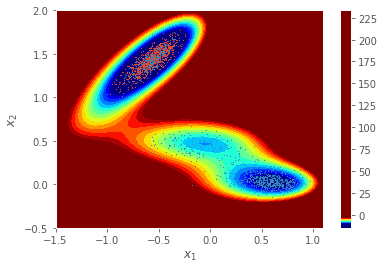

In [167]:
visuals.plot_2D_potential(mw_sim_1.simulation.central_potential, xlim = [-1.5, 1.1], ylim = [-0.5, 2], cmap = "jet")
plt.scatter(*a.T, s=0.5)
plt.scatter(*b.T, s=0.5)

# Double well Potential

In [168]:
dw_sim_1 = simulations.SimulationData("configs/double_well_config_1.yml")
dw_sim_1.runSimulation()
dw_sim_2 = simulations.SimulationData("configs/double_well_config_2.yml")
dw_sim_2.runSimulation()

In [169]:
a = dw_sim_1.getData()
b = dw_sim_2.getData()

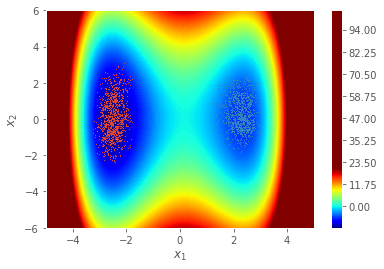

In [171]:
visuals.plot_2D_potential(dw_sim_1.simulation.central_potential, xlim = [-5, 5], ylim = [-6, 6], cmap = "jet", min = None, max = 20)
plt.scatter(*a.T, s=0.5)
plt.scatter(*b.T, s=0.5)

# Dimer Simulation (MD)

In [237]:
dimer_sim_md = simulations.SimulationData("configs/dimer_sim_config_md_1.yml")

In [220]:
dimer_sim_md.loadSimulation("dimer_md_traj.npy")
dimer_sim_md.getData().shape

(501, 36, 2)

In [238]:
dimer_sim_md.runSimulation()

APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEE

APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEE

APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEE

APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEE

APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS
0 and 1
APPLYING BOND BETWEEN ATOMS


In [239]:
a = dimer_sim_md.getData()

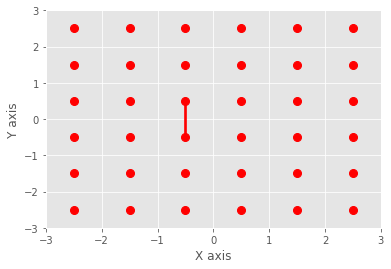

In [240]:
visuals.make_2D_traj_bond(a, dimer_sim_md.simulation.system.box, [[0, 1]])

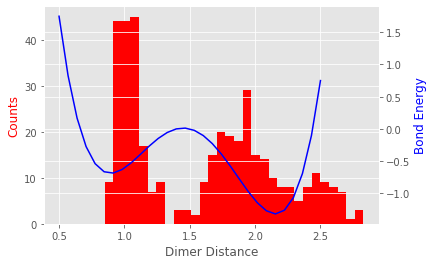

In [232]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.set_xlabel("Dimer Distance")
ax1.set_ylabel("Counts", color = "red")
ax1.hist(np.array(dimer_sim_md.simulation.dist_logger.d[-400:]), bins = 30, color = "red")
ax1.tick_params(axis = 'y')

x = np.linspace(0.5, 2.5, 30)
y = np.array([dimer_sim_md.simulation.system.bonds[0].potential(x)]).reshape(-1)

ax2.plot(x,y, color = "blue")
ax2.set_ylabel("Bond Energy", color="blue")
ax2.tick_params(axis='y')

In [233]:
dimer_sim_md.simulation.system.bonds[0].get_energy()

-0.536480954717716

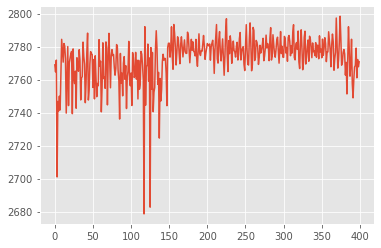

In [234]:
plt.plot(dimer_sim_md.simulation.energy_logger.H[-400:])
# plt.plot(dimer_sim_md.energy_logger.U[-400:])
# plt.plot(dimer_sim_md.energy_logger.K[-400:])


In [235]:
a.shape

(501, 36, 2)

In [236]:
np.save("dimer_md_traj", a)

# Dimer Simulation (MC)

In [201]:
dimer_sim_mc = simulations.SimulationData("configs/dimer_sim_config_mc.yml")

In [202]:
dimer_sim_mc.runSimulation()

In [203]:
a = dimer_sim_mc.getData()

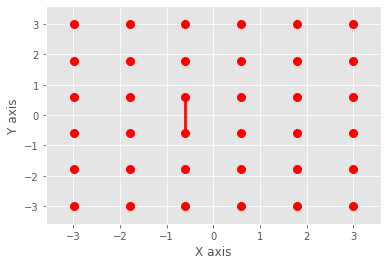

In [204]:
visuals.make_2D_traj_bond(a, dimer_sim_mc.simulation.system.box, [[0, 1]])

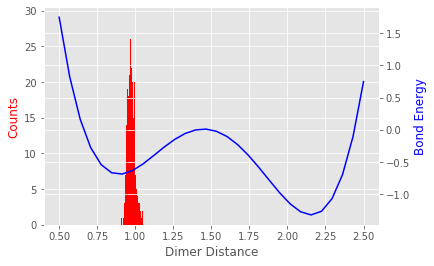

In [205]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.set_xlabel("Dimer Distance")
ax1.set_ylabel("Counts", color = "red")
ax1.hist(np.array(dimer_sim_mc.simulation.dist_logger.d[-400:]), bins = 40, color = "red")
ax1.tick_params(axis = 'y')

x = np.linspace(0.5, 2.5, 30)
y = np.array([dimer_sim_mc.simulation.system.bonds[0].potential(x)]).reshape(-1)

ax2.plot(x,y, color = "blue")
ax2.set_ylabel("Bond Energy", color="blue")
ax2.tick_params(axis='y')

In [216]:
dimer_sim_mc.getEnergy(a[500])

2119.213065812066

In [217]:
dimer_sim_mc.saveSimulation("data/dimer-simulation-mc")